In [2]:
import os
import sys

import numpy as np
import matplotlib.pyplot as plt

import pyfstat
import torch
import torchaudio
from scipy import stats

%matplotlib inline

/home/wangjingqi/anaconda3/envs/game/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [1]:
a = [ 1,2,3]
a.pop(1)

2

In [8]:
import pandas as pd
import numpy as np
a1 = pd.read_csv("/home/wangjingqi/input/ck/g2net/0.737_tf_efficientnet_b7_ns.csv")
a2 = pd.read_csv("/home/wangjingqi/input/ck/g2net/0.738_tf_efficientnet_b8_ap.csv")
a3 = pd.read_csv("/home/wangjingqi/input/ck/g2net/0.743_tf_efficientnet_b7_ns.csv")

In [9]:
a1a2 = pd.DataFrame({"id":a1.id,"target":(a1.target+a2.target)/2})

In [10]:
a1a2.to_csv("/home/wangjingqi/input/ck/g2net/0.737_0.738.csv",index=False)

In [11]:
a1a2a3 = pd.DataFrame({"id":a1.id,"target":(a1a2.target*0.74+a3.target*0.743)/(0.74+0.743)})

In [12]:
a1a2a3.to_csv("/home/wangjingqi/input/ck/g2net/0.737_0.738_0.743.csv",index=False)

In [9]:
import torch
import torch.nn as nn
import torch.nn.functional as F
a  = torch.tensor([80,80]).float()
nn.SmoothL1Loss()(a,torch.tensor([0,0]))

tensor(79.5000)

In [107]:
(torchaudio.transforms.TimeMasking(20)(torch.randn(1, 3,1024)).sum(-2)==0).sum()

tensor(0)

In [11]:
def process(data: np.ndarray) -> np.ndarray:
        data = data*1e22
        data = data.imag**2 + data.real**2
        tmp = np.zeros((360,4800))
        tmp[:,:data.shape[-1]] = data[:,:4800]
        return tmp

In [13]:
dir = "/home/wangjingqi/input/dataset/g2net/test"
files = os.listdir(dir)
files = [os.path.join(dir,file) for file in files]
from tqdm import tqdm
x_tot,x2_tot = [],[]
for f in tqdm(files):
    
    x = np.load(f,allow_pickle=True).item()
    h1 = process(x["H1"])
    l1 = process(x["L1"])
    data = np.concatenate((np.expand_dims(h1,axis=0),np.expand_dims(l1,axis=0)),axis=0)
    data = np.mean(data.reshape(2,360,120,40), axis=2)
    x_tot.append(data.reshape(2,-1).mean(-1))
    x2_tot.append((data**2).reshape(2,-1).mean(-1))

100%|██████████| 7975/7975 [05:49<00:00, 22.80it/s]


In [14]:
len(x_tot),len(x2_tot)

(7975, 7975)

In [17]:
data.mean()

2.008557680242548

In [19]:
import random
np.arange(10)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [15]:
img_avr =  np.array(x_tot).mean(0)
img_std =  np.sqrt(np.array(x2_tot).mean(0) - img_avr**2)
print(img_avr,img_std)

[2.30803864 2.25657319] [16.30074069 22.07475941]


In [51]:
from os.path import join
import os

# import tifffile as tiff
import pandas as pd
import random
import cv2
from matplotlib import pyplot as plt
from albumentations import *
import numpy as np
from PIL import Image
def visualize(original_image,image):
    fontsize = 18

    f, ax = plt.subplots(1, 2, figsize=(8, 8))

    ax[ 0].imshow(original_image)
    ax[0].set_title('Original image', fontsize=fontsize)

    ax[1].imshow(image)
    ax[ 1].set_title('Transformed image', fontsize=fontsize)


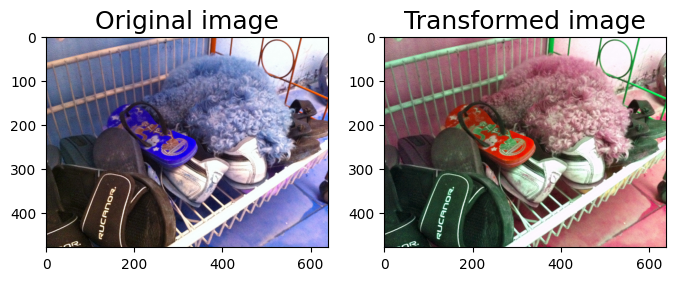

In [66]:
from os.path import join
import os

# import tifffile as tiff
import pandas as pd
import random
import cv2
from matplotlib import pyplot as plt
from albumentations import *
import numpy as np
from PIL import Image
def visualize(original_image,image):
    fontsize = 18

    f, ax = plt.subplots(1, 2, figsize=(8, 8))

    ax[ 0].imshow(original_image)
    ax[0].set_title('Original image', fontsize=fontsize)

    ax[1].imshow(image)
    ax[ 1].set_title('Transformed image', fontsize=fontsize)

im = cv2.imread("/home/wangjingqi/input/dataset/coco/val2014/COCO_val2014_000000000042.jpg")
aug = Compose([
    
    ChannelShuffle(p=1),],p=1)
augmented = aug(image=im)["image"]
augmented = np.roll(augmented,478,axis=0)
visualize(im,augmented,)

In [73]:
(1-np.roll(np.transpose(augmented,(2,0,1)),180,axis=1)==np.transpose(np.roll(augmented,180,axis=0),(2,0,1))).sum()

0

In [1]:
import torchtext

/home/wangjingqi/anaconda3/envs/game/lib/python3.7/site-packages/tqdm/auto.py:22: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [ ]:
torchtext.data.f

In [68]:
augmented.shape

(478, 640, 3)

In [4]:
import numpy as np
np.load("/home/wangjingqi/input/dataset/g2net/generted_train/Signal_0.npy",allow_pickle=True).item()["H1"].shape

(360, 128)

In [1]:
import pandas as pd

import os
import numpy as np
model_fname = [
"tf_efficientnet_b7_ns_2000",

]
selected = np.arange(len(model_fname))
model_fname
def avg_log(model_fname):
    log_list =os.listdir(os.path.join("/home/wangjingqi/input/ck/g2net",model_fname,"log"))
    log_list = [os.path.join("/home/wangjingqi/input/ck/g2net",model_fname,"log",l) for l in log_list ]
    log_list = [pd.read_csv(l).dropna(axis=0,how='any').loc[:,["roc","acc"]].max() for l in log_list]
    avg_log = 0
    for log in log_list:
        avg_log +=log
    avg_log /= len(log_list)
    return avg_log
def log_list(model_fname):
    logs = [avg_log(log) for log in model_fname]
    logs = pd.concat(logs,axis=1)
    logs.columns=model_fname
    
    return logs

logs = log_list(model_fname)

In [2]:
logs

,tf_efficientnet_b7_ns_2000
roc,0.853187
acc,0.740000


In [ ]:

# These parameters describe background noise and data format
writer_kwargs = {
                "tstart": 1238166018,
                "duration": 4965*1800,  
                "detectors": "H1,L1",        
                "sqrtSX": 1e-23,          
                "Tsft": 1800,  
                "Band": 0.2,           
                "SFTWindowType": "tukey", 
                "SFTWindowBeta": 0.01,
            }

# This class allows us to sample signal parameters from a specific population.
# Implicitly, sky positions are drawn uniformly across the celestial sphere.
# PyFstat also implements a convenient set of priors to sample a population
# of isotropically oriented neutron stars.
signal_parameters_generator = pyfstat.AllSkyInjectionParametersGenerator(
    priors={
        "tref": writer_kwargs["tstart"],
        "F0": np.random.randint(50,500),
        "F1": lambda: 10**stats.uniform(-12, 4).rvs(),
        "h0":  writer_kwargs["sqrtSX"] / 1000000,
        **pyfstat.injection_parameters.isotropic_amplitude_priors,
    },
)

params = signal_parameters_generator.draw()
writer_kwargs["outdir"] = os.path.join("./",f"Signal")
writer_kwargs["label"] = f"Signal"
writer0 = pyfstat.Writer(**writer_kwargs, **params)
writer0.make_data()

In [ ]:
frequency, timestamps, amplitudes = pyfstat.helper_functions.get_sft_as_arrays(
        writer0.sftfilepath
    )
print("amplitudes shape: ",amplitudes["H1"].shape)
data = {"H1": [amplitudes["H1"],timestamps["H1"]], "L1": [amplitudes["L1"],timestamps["L1"]], "freq_hz": frequency}
fig, ax = plt.subplots(2, 2, figsize=(16, 10))

for d_ind, detector in enumerate(["H1", "L1"]):
    ax[d_ind][0].set(xlabel="Timestamps [GPS]",
                     ylabel="Frequency [Hz]",
                     title=f"{detector} - Real part")
    ax[d_ind][1].set(xlabel="Timestamps [GPS]",
                     ylabel="Frequency [Hz]",
                     title=f"{detector} - Imaginary part")

    c0 = ax[d_ind][0].pcolormesh(data[detector][1], data["freq_hz"], 
                                 data[detector][0].real)
    c1 = ax[d_ind][1].pcolormesh(data[detector][1], data["freq_hz"], 
                                 data[detector][0].imag)

    fig.colorbar(c0, ax=ax[d_ind][0])
    fig.colorbar(c1, ax=ax[d_ind][1])
plt.show()


In [31]:
import pandas as pd
pd.read_csv("/home/wangjingqi/g2net/timestamps_len.csv").describe()

,Unnamed: 0,timestamps_len
count,7975.000000,7975.000000
mean,3987.000000,4586.144828
std,2302.328531,80.703136
min,0.000000,4281.000000
25%,1993.500000,4533.000000
50%,3987.000000,4587.000000
75%,5980.500000,4640.000000
max,7974.000000,4887.000000


In [30]:
import pandas as pd
import torch
sub = pd.read_csv("/home/wangjingqi/input/ck/g2net/tf_efficientnet_b7_ns_2000.csv")

In [31]:
t = sub.target
mean = t.mean()
std = t.std()
t.describe()

count    7975.000000
mean       11.353965
std        42.360598
min        -0.225015
25%        -0.046776
50%        -0.033811
75%         0.008566
max      1312.346252
Name: target, dtype: float64

In [32]:
def filter(x):

        return torch.tensor((x-mean)/std).sigmoid().item()
t = t.apply(filter)

In [35]:
t

0       0.433108
1       0.472216
2       0.433041
3       0.435875
4       0.433084
          ...   
7970    0.433273
7971    0.433226
7972    0.433247
7973    0.433379
7974    0.433172
Name: target, Length: 7975, dtype: float64

In [34]:
sub.target = t
sub.to_csv("/home/wangjingqi/input/ck/g2net/tf_efficientnet_b7_ns_2000_v1.csv",index=False)